In [9]:
!pip install pyserial

In [10]:
from __future__ import print_function
from yapsy.PluginManager import PluginManager
import argparse  # new in Python2.7
import atexit
import logging
import string
import sys
import threading
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import numpy as np
from scipy import signal
import serial 

In [11]:
logging.basicConfig(level=logging.ERROR)
# Load the plugins from the plugin directory.
manager = PluginManager()

In [12]:
%run user.py --add csv_collect record.csv

------------user.py-------------------------user.py-------------
Board type: OpenBCI Cyton (v3 API)
Will try do auto-detect board's port. Set it manually with '--port' if it goes wrong.

------------SETTINGS-------------
Notch filtering:True
user.py: Logging Disabled.

-------INSTANTIATING BOARD-------

Board type: OpenBCI Cyton (v3 API)
Will try do auto-detect board's port. Set it manually with '--port' if it goes wrong.

------------SETTINGS-------------
Notch filtering:True
user.py: Logging Disabled.

-------INSTANTIATING BOARD-------
Connecting to V3 at port /dev/tty.usbserial-DM00Q8QL
Serial established...
Connecting to V3 at port /dev/tty.usbserial-DM00Q8QL
Serial established...
OpenBCI V3 8-16 channel
On Board ADS1299 Device ID: 0x3E
LIS3DH Device ID: 0x33
Firmware: v3.1.0
$$$
No daisy:
8 EEG channels and 3 AUX channels at 250.0 Hz.

------------PLUGINS--------------
Found plugins:
[ udp_server ]
[ csv_collect ]
[ print ]
[ streamer_osc ]
[ streamer_tcp ]
[ streamer_lsl ]
[ samp

In [13]:
time.sleep(6)
filelist=os.listdir('./')
for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
    if not(fichier.endswith(".csv")):
        filelist.remove(fichier)
print(filelist)

Stopping streaming...
Wait for buffer to flush...
Stopping streaming...
Wait for buffer to flush...
['record_2019-4-29_16-53-6.csv', 'record_2019-4-29_16-18-55.csv', 'record_2019-4-29_16-19-14.csv', 'record.csv_2019-4-29_18-6-36.csv', 'record_2019-4-29_18-2-18.csv', 'record_2019-4-29_16-18-45.csv', 'record_2019-4-29_16-27-12.csv', 'record_2019-4-29_16-18-35.csv', 'record.csv_2019-4-29_18-30-50.csv', 'record.csv_2019-4-29_18-10-35.csv', 'record.csv_2019-4-29_18-27-58.csv', 'record_2019-4-29_18-5-58.csv', 'record.csv_2019-4-29_18-33-38.csv', 'record_2019-4-29_16-18-26.csv', 'record.csv_2019-4-29_16-38-20.csv', 'record_2019-4-29_16-42-50.csv', 'record.csv_2019-4-29_16-53-56.csv', 'record_2019-4-29_16-19-4.csv', 'record_2019-4-29_18-10-3.csv', 'record_2019-4-29_16-19-24.csv', 'record_2019-4-29_17-44-36.csv']
['record_2019-4-29_16-53-6.csv', 'record_2019-4-29_16-18-55.csv', 'record_2019-4-29_16-19-14.csv', 'record.csv_2019-4-29_18-6-36.csv', 'record_2019-4-29_18-2-18.csv', 'record_2019-4-29

In [14]:
filelist.sort(key=lambda x: os.path.getmtime(x))
filelist[-1]

'record.csv_2019-4-29_18-33-38.csv'

'record.csv_2019-4-29_18-33-38.csv'

In [15]:

#ps= serial.Serial('/dev/cu.usbmodem14201',9600)
cont=0

df2 = pd.read_csv(filelist[-1], delimiter = ',',names=['Tiempo', '1', '2','3','4','5','6','7','8','9'])
dt = df2.loc[: , "7"]
data = pd.to_numeric(dt,downcast='signed')
np.nan_to_num(data,[])


array([      0.        ,       0.        , -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174,

array([      0.        ,       0.        , -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174, -187500.02235174, -187500.02235174,
       -187500.02235174,

In [7]:
fs= 250
t = np.arange(1,len(data)+1,1)
    
tsample = 1/fs
# In[] Filtros
f_low = 50                        
f_high = 1                      
# Filtro pasa bajas de 50 hz
b, a = signal.butter(2, 2*f_low/fs, btype='low')
filt= signal.filtfilt(b, a, data)
#Filtro pasa altas de 1 hz
b1, a1 = signal.butter(2, 2*f_high/fs, btype='high') 
filt1= signal.filtfilt(b1, a1, filt)
#Filtro Notch
fstart=(58)/fs*2;# Cutoff frequencies
fstop=(62)/fs*2;# Cutoff frequencies
b2, a2 = signal.butter(2,[fstart,fstop],'bandstop'); # Calculate filter coefficients
filt2= signal.filtfilt(b2, a2, filt1)
filt2=filt2/24
   
# In[] Transformada de Fourier
ft = np.abs(np.fft.fft(filt2)) #Magnitud 
ft = ft[0:int(len(ft)/2)] 
f = np.linspace(0,fs/2,len(ft))# Vector de frecuencias 

/Users/Fernando/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/Fernando/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


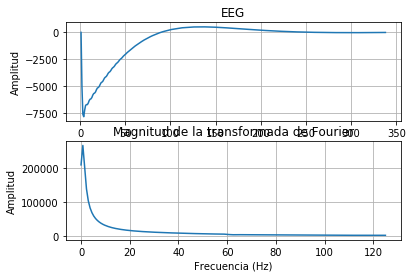

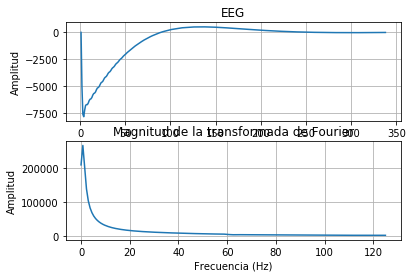

In [8]:
plt.figure()
ax1 = plt.subplot(2,1,1)
plt.plot(t,filt2)
plt.title('EEG'),plt.xlabel('Tiempo (s)'),plt.ylabel('Amplitud')
plt.grid()
ax1 = plt.subplot(2,1,2)
plt.plot(f,ft)
plt.title('Magnitud de la transformada de Fourier'),plt.xlabel('Frecuencia (Hz)'),plt.ylabel('Amplitud')
plt.grid()
plt.show()

In [ ]:
for i in range(len(f)): 
        f1= f[i,]
        if f1 >= 8 and f1<= 14:
            amp=ft[i,]
            print(amp)
            if amp >= 200:
                #20500
                ps.write(1)
                print("1")
            
            else: 
                ps.write(0)